# Lesson 3

In [39]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('merged_clean_reduced.csv')
data.head()

,gender,median_home_val,ic2,ic3,avggift,target_d
0,M,1158.437751,430,466,28.000000,100.0
1,M,537.000000,415,410,5.666667,7.0
2,F,725.000000,340,361,4.111111,5.0
3,M,1158.437751,407,399,27.277778,38.0
4,F,995.000000,280,316,6.000000,5.0


In [3]:
data.shape

(3546, 6)

In [ ]:
# Exploratory data analysis using matplotlib

In [4]:
#!pip3 install seaborn if you need to
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [5]:
data['gender'].value_counts()

F    2080
M    1466
Name: gender, dtype: int64

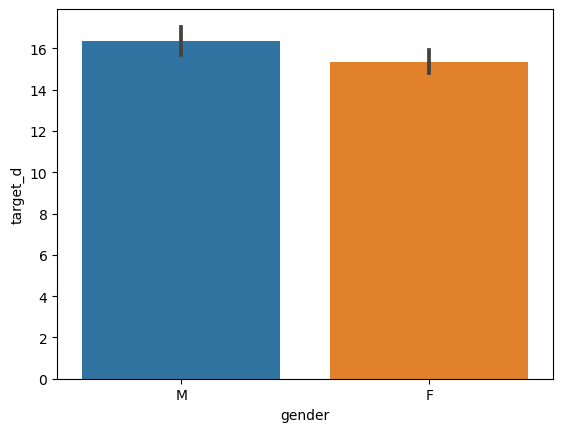

In [6]:
# everything can be a bar chart, but that is a sad sad world
sns.barplot(x="gender", y="target_d", data=data)
plt.show()

In [7]:
data['donated_big'] = data['target_d']>10
data.head()

,gender,median_home_val,ic2,ic3,avggift,target_d,donated_big
0,M,1158.437751,430,466,28.000000,100.0,True
1,M,537.000000,415,410,5.666667,7.0,False
2,F,725.000000,340,361,4.111111,5.0,False
3,M,1158.437751,407,399,27.277778,38.0,True
4,F,995.000000,280,316,6.000000,5.0,False


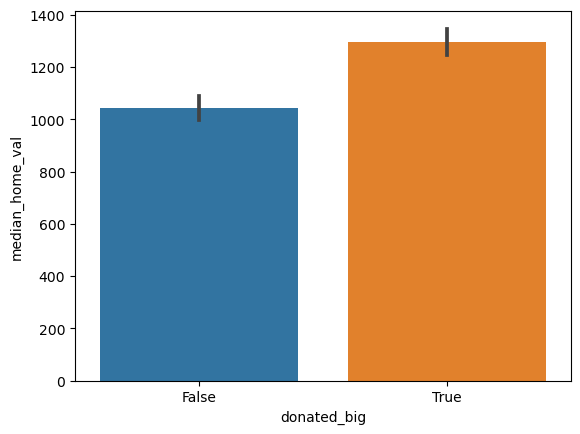

In [8]:
# everything can be a bar chart, but that is a sad sad world
sns.barplot(x="donated_big", y="median_home_val", data=data)
plt.show()

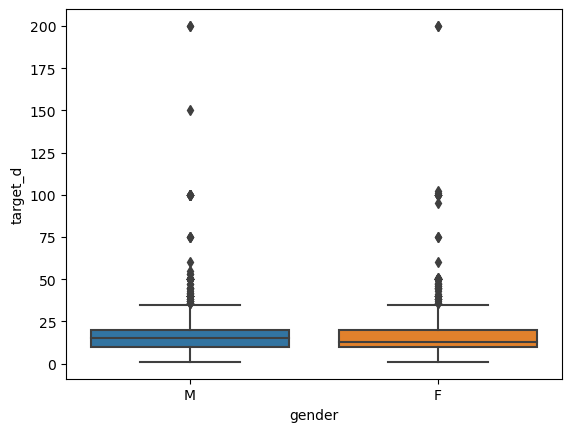

In [9]:
# boxplots are very powerful for EDA but you should never put one in front of a client
sns.boxplot(x = 'gender',y='target_d', data=data)
plt.show()

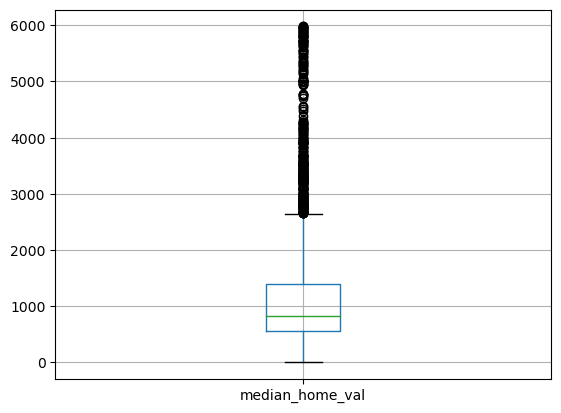

In [10]:
# for quick visualization somethime we do this without explicitly calling sns or plt 
data[['median_home_val']].boxplot()
plt.show()

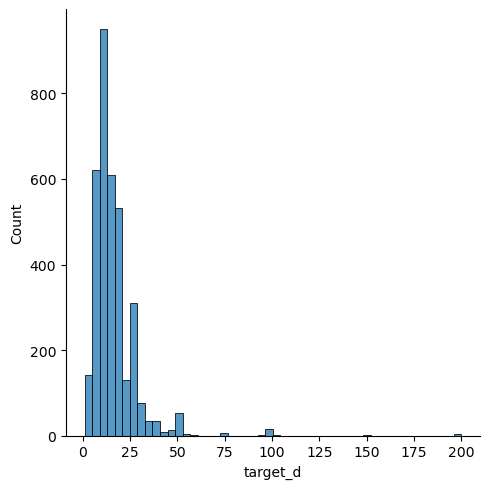

In [12]:
# distributions can shed a bit more light than boxplots, but are not as succint
sns.displot(data['target_d'], bins=50)
plt.show()

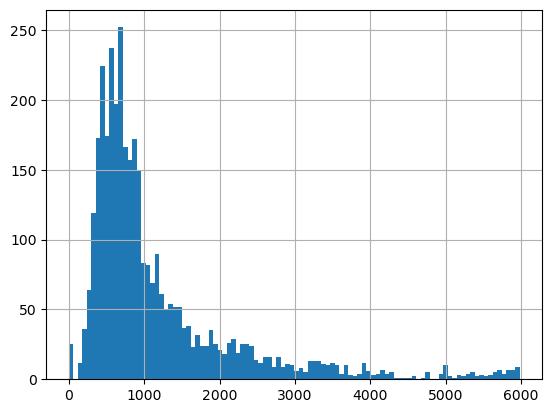

In [13]:
# for quick visualization
data['median_home_val'].hist(bins=100)
plt.show()

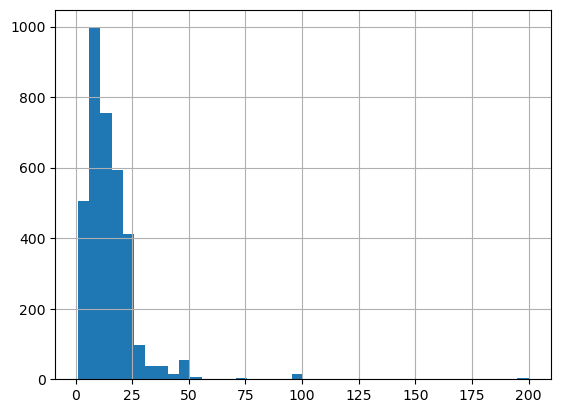

In [14]:
# for quick visualization
data['target_d'].hist(bins=40)
plt.show()

In [15]:
#scatterplots are great to compare two distinct variables and see if they are somehow related!
sns.scatterplot(x=data['ic2'], y=data['ic'])
plt.show()

KeyError: 'ic'

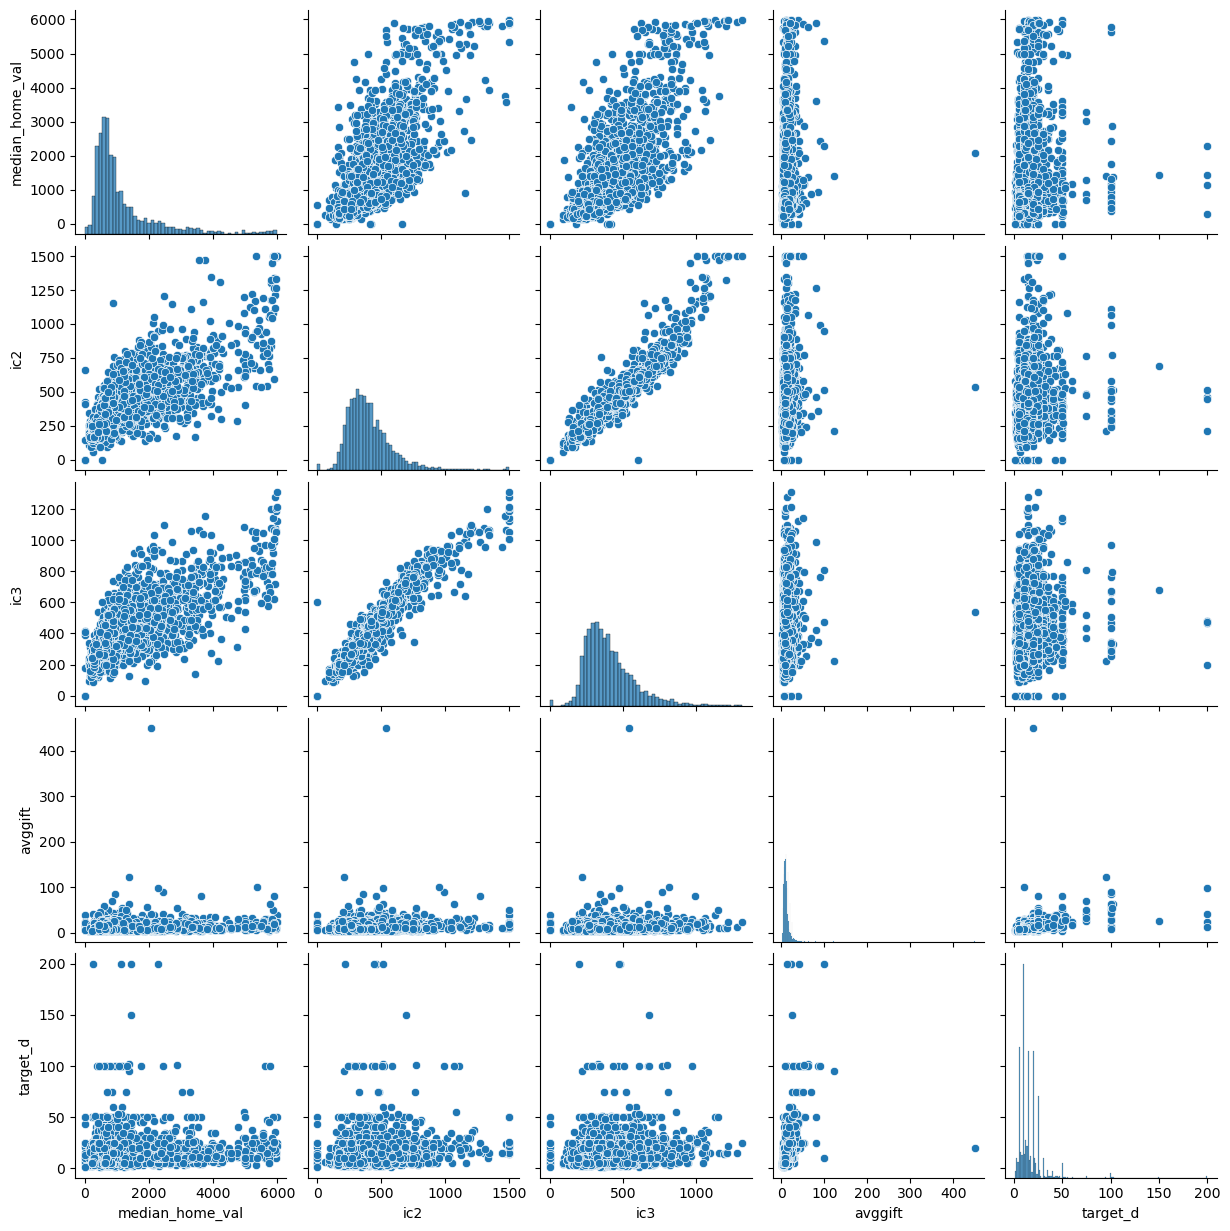

In [16]:
# the big bomb of Visual Data Anlysis
data=data.drop(['donated_big'], axis=1)
sns.pairplot(data)


In [17]:
#finally, some notions on correlation: is our dataset generally independent or are we seeing the same thing over and over?
# when not specified, always shows Pearson correlation
correlations_matrix = data.corr()
correlations_matrix

C:\Users\ninav\AppData\Local\Temp\ipykernel_32644\237365763.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations_matrix = data.corr()


,median_home_val,ic2,ic3,avggift,target_d
median_home_val,1.000000,0.745089,0.737860,0.142251,0.114667
ic2,0.745089,1.000000,0.954224,0.136759,0.130352
ic3,0.737860,0.954224,1.000000,0.122955,0.119278
avggift,0.142251,0.136759,0.122955,1.000000,0.477150
target_d,0.114667,0.130352,0.119278,0.477150,1.000000


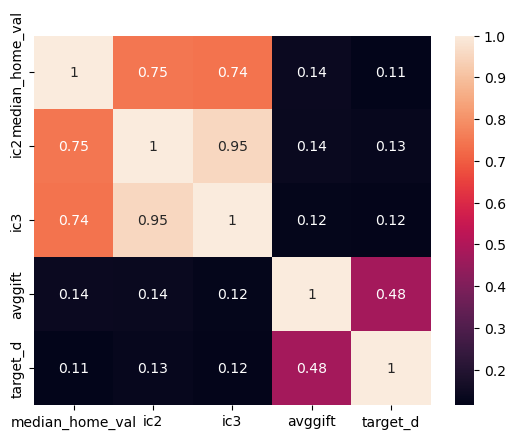

In [18]:
sns.heatmap(correlations_matrix, annot=True)
plt.show()

# Lesson 4

In [ ]:
#discussion on distributions + normal distribution

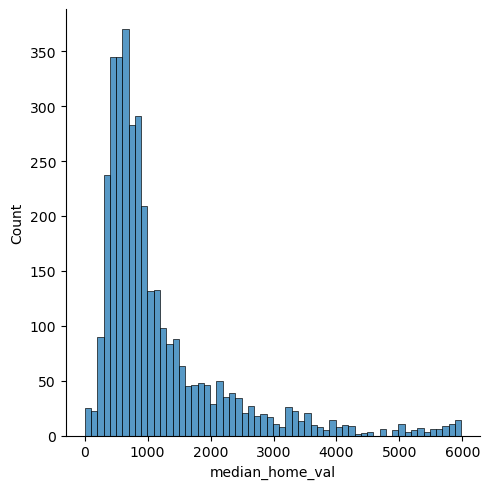

In [20]:
sns.displot(data['median_home_val'], bins=60)
plt.show()

In [24]:
heights=[186, 173, 165, 163, 178, 160, 192, 193, 172, 165, 157, 166, 180, 202]

shoe_size = [44, 39, 37, 41, 43, 38, 46, 44, 39, 38, 43, 38, 40, 47]



C:\Users\ninav\AppData\Local\Temp\ipykernel_32644\312648670.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heights,bins=20)


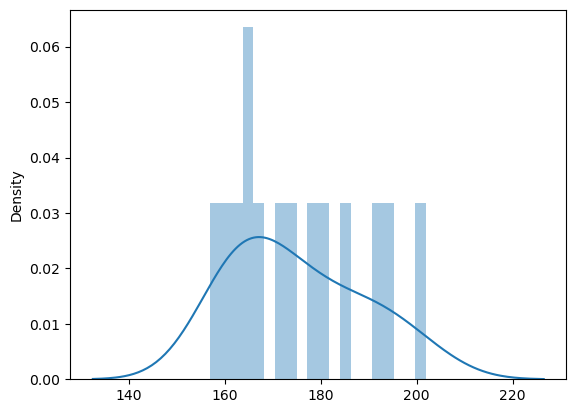

In [25]:
sns.distplot(heights,bins=20)
plt.show()

C:\Users\ninav\AppData\Local\Temp\ipykernel_32644\2342585309.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(shoe_size,bins=20)


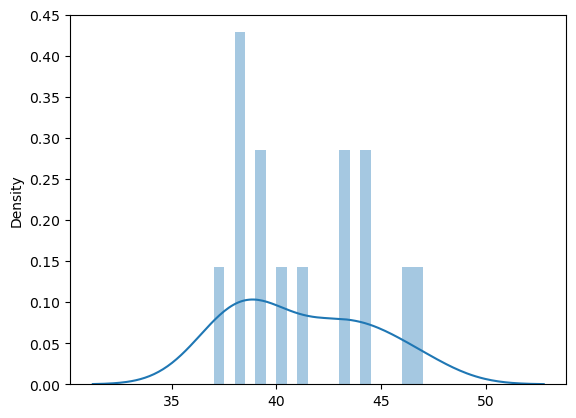

In [26]:
sns.distplot(shoe_size,bins=20)
plt.show()

In [27]:
import random
throw_10000_dice = [random.randint(1,6) for i in range(10000)]
throw_10000_pairsofdice = [random.randint(1,6)+random.randint(1,6) for i in range(10000)]
throw_10000_triosofdice = [random.randint(1,6)+random.randint(1,6)+random.randint(1,6) for i in range(10000)]

In [28]:
throw_10000_triosofdice

[13,
 10,
 11,
 7,
 17,
 6,
 4,
 12,
 11,
 8,
 12,
 9,
 12,
 14,
 5,
 9,
 11,
 5,
 13,
 9,
 11,
 9,
 16,
 7,
 4,
 11,
 17,
 14,
 12,
 5,
 15,
 14,
 7,
 5,
 9,
 11,
 7,
 8,
 10,
 6,
 8,
 11,
 6,
 10,
 9,
 4,
 14,
 15,
 12,
 8,
 17,
 8,
 12,
 14,
 8,
 12,
 14,
 12,
 10,
 14,
 9,
 10,
 6,
 15,
 5,
 9,
 7,
 13,
 9,
 15,
 12,
 9,
 14,
 6,
 8,
 16,
 4,
 13,
 12,
 5,
 12,
 12,
 8,
 11,
 9,
 12,
 12,
 12,
 11,
 9,
 9,
 11,
 14,
 14,
 11,
 11,
 11,
 11,
 17,
 14,
 5,
 10,
 11,
 11,
 7,
 12,
 12,
 9,
 11,
 8,
 13,
 6,
 9,
 10,
 9,
 10,
 9,
 11,
 7,
 11,
 13,
 15,
 9,
 11,
 11,
 9,
 12,
 15,
 10,
 14,
 14,
 9,
 5,
 9,
 6,
 9,
 9,
 9,
 9,
 7,
 14,
 13,
 15,
 7,
 6,
 12,
 15,
 17,
 14,
 8,
 5,
 9,
 9,
 8,
 15,
 10,
 11,
 8,
 10,
 10,
 11,
 8,
 10,
 13,
 11,
 10,
 13,
 7,
 12,
 8,
 12,
 14,
 13,
 9,
 11,
 18,
 13,
 16,
 8,
 10,
 5,
 7,
 14,
 15,
 7,
 12,
 11,
 13,
 7,
 11,
 11,
 13,
 6,
 10,
 10,
 6,
 7,
 14,
 10,
 9,
 18,
 6,
 14,
 6,
 9,
 11,
 12,
 8,
 13,
 17,
 17,
 7,
 11,
 13,
 10,
 7,
 13,
 14

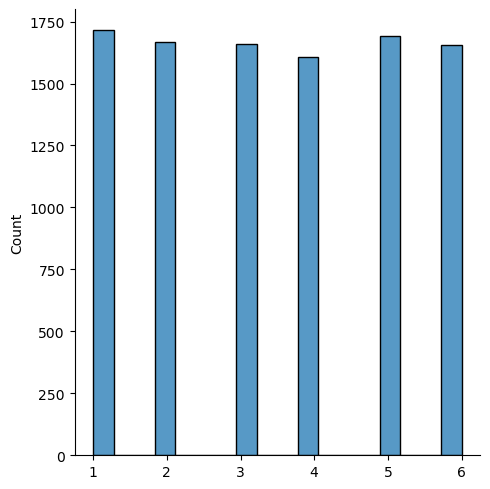

In [30]:
sns.displot(throw_10000_dice)
plt.show()

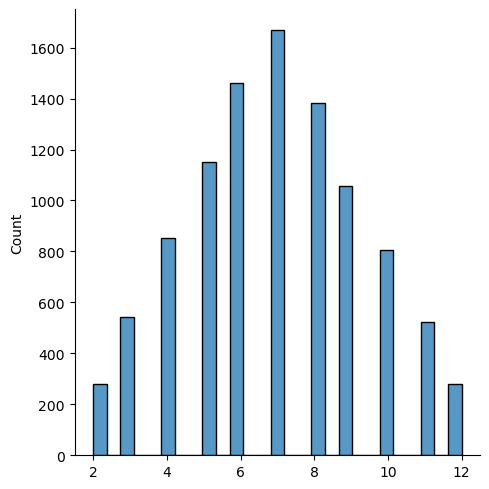

In [32]:
sns.displot(throw_10000_pairsofdice)
plt.show()

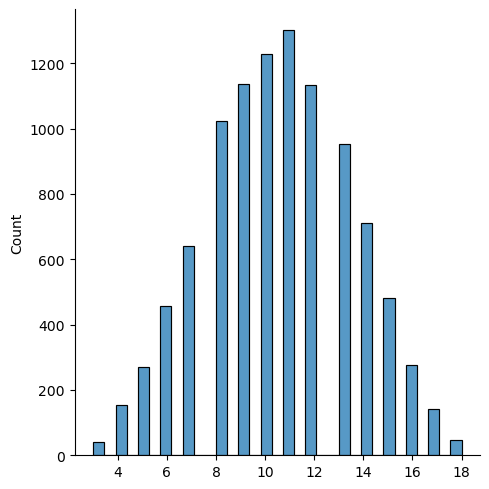

In [34]:
sns.displot(throw_10000_triosofdice)
plt.show()

In [35]:
np.random.randn(5)

array([ 0.71718171, -0.19582707,  0.97180601,  0.6619292 ,  0.26241905])

C:\Users\ninav\AppData\Local\Temp\ipykernel_32644\2399691482.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x,bins=50)


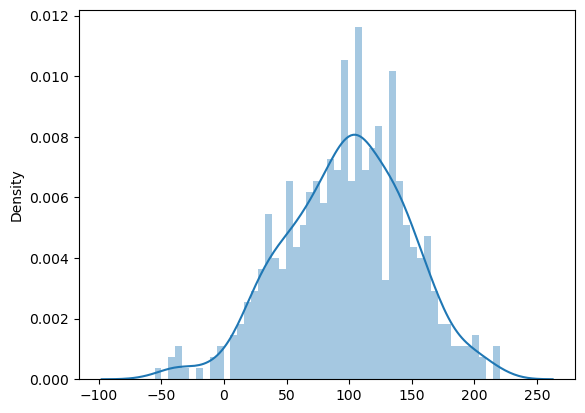

In [36]:
mu, sigma = 100, 50
x = mu + sigma * np.random.randn(500)

# the histogram of the data
sns.distplot(x,bins=50)
plt.show()

C:\Users\ninav\AppData\Local\Temp\ipykernel_32644\3869069163.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x,bins=50)


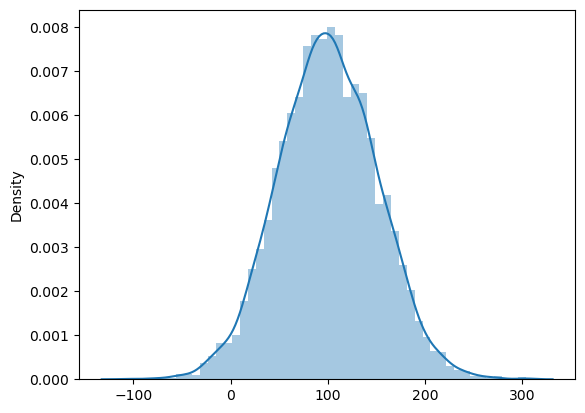

In [37]:
mu, sigma = 100, 50
x = mu + sigma * np.random.randn(5000)
# the histogram of the data
sns.distplot(x,bins=50)
plt.show()

In [ ]:
mu, sigma = 100, 50
x = mu + sigma * np.random.randn(50000)
# the histogram of the data
sns.distplot(x,bins=500)
plt.show()

In [ ]:
# why is this distribution so important?
# occurs naturally
# single peak, symmetrical, tapers off

C:\Users\ninav\AppData\Local\Temp\ipykernel_32644\2460983276.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(shoe_size,bins=20)


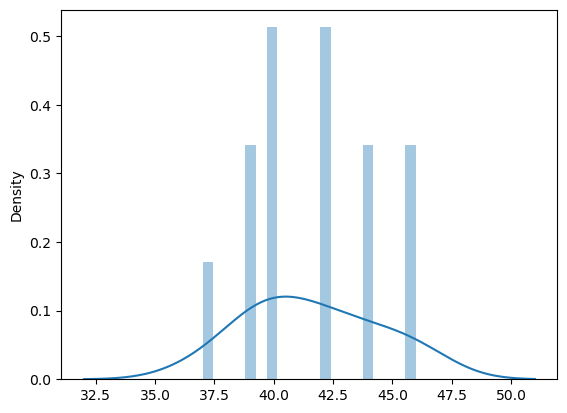

In [38]:
#discussion back on shoe sizes, are they normally distributed?
shoe_size = [46, 44, 42, 37, 39, 42, 40, 39, 40, 44, 42, 40, 46]

sns.distplot(shoe_size,bins=20)
plt.show()